# Linear Regresion with PyTorch
## Synthetic Training Data

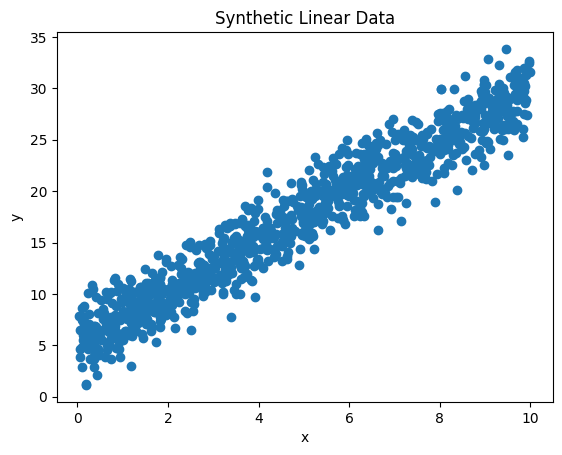

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of training examples
m = 1000

# Generate 100 random x values
X = np.random.rand(1,m) * 10  # values between 0 and 10

# Define a true linear relationship: y = 2.5x + 5 + some noise
noise = np.random.randn(1,m) * 2  # Gaussian noise
y = 2.5 * X + 5 + noise

# Plot it
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Linear Data")
plt.show()

## Training Loop

In [2]:
import torch

# Hyperparameters
alpha = 0.01
n_iter = 2000

# Convert to torch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
m = X.shape[1]

# Initialize weights and bias (requires gradients)
w = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

# Store losses and parameters for plotting
losses = []
weights = []
biases = []

# Training loop
for _ in range(n_iter):
    # Forward pass
    z = w.T @ X + b  # shape (1, m)
    loss = torch.sum((z - y) ** 2) / m
    losses.append(loss.item())

    # Backward pass
    loss.backward()

    # Update weights and bias manually
    with torch.no_grad():
       w -= alpha * w.grad
       b -= alpha * b.grad

    # Store weights and bias
    weights.append(w.item())
    biases.append(b.item())

    # Zero gradients
    w.grad.zero_()
    b.grad.zero_()

    

 ## Visualizing the loss and parameter updates

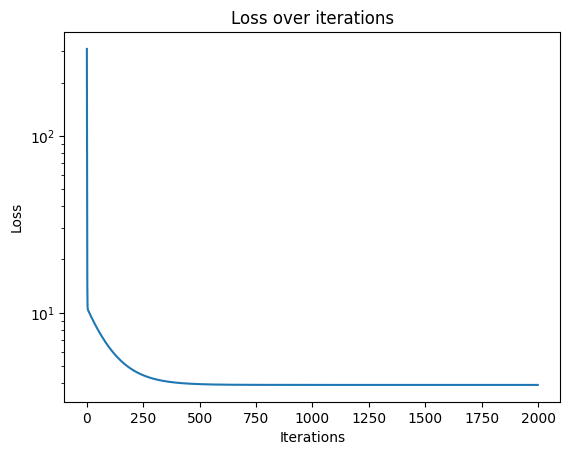

In [3]:
# Plot the loss
plt.semilogy(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss over iterations")
plt.show()

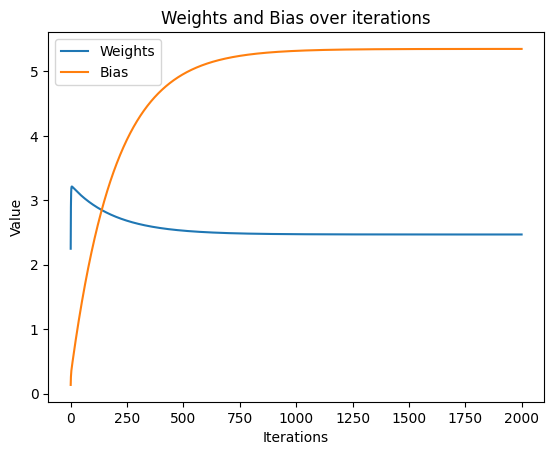

Final weight: 2.4690704345703125
Final bias: 5.349380016326904


In [4]:
# Plot the weights and bias
plt.plot(weights, label="Weights")
plt.plot(biases, label="Bias")
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.title("Weights and Bias over iterations")
plt.legend()
plt.show()

# Final parameters
print(f"Final weight: {w.item()}")
print(f"Final bias: {b.item()}")

## Final Predictions

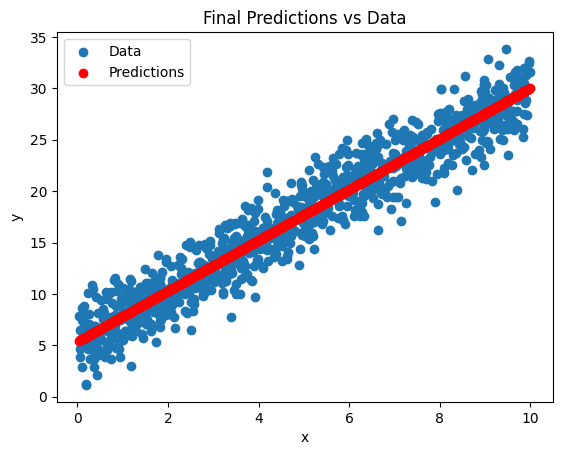

In [5]:
# Final prediction
predictions = w.T @ X + b
plt.scatter(X, y, label="Data")
plt.scatter(X, predictions.detach(), color='red', label="Predictions")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Final Predictions vs Data")
plt.legend()
plt.show()